# Apresentação:

    Nessa guerra de modelos generativos, já existe muitos materiais
    sobre a API da OpenAI, muito atrás do motor generativo da empresa,
    o GPT.

    A ideia aqui é explorar um pouco da IA do google e ver do que ela é
    capaz. Você vai ver que existe uma taxa máxima de solicitação dos
    modelos, isso porque, difente da API Open AI, a API do Gemini é
    inicialmente gratuíta, o que é bastante interessante.

**Instalando o SDK**

    Primeiro passo da brincadeira é instalar o SDK (Software Developer
    Kit) que, diga-se de passagem é diferente de API.

API x SDK:

    Você usa APIs quando deseja acessar a funcionalidade escrita por
    outro desenvolvedor por meio de uma interface adequada. Você usa
    um SDK quando quer ferramentas específicas da plataforma para escrever
    código com mais rapidez. Em vez de escolher entre uma API ou um SDK,
    você pode usar os dois ao desenvolver software.

    Na prática funciona da mesma forma, você intala com o pip e usa igual
    qualquer outra bibioteca. Mas eu gosto de fazer essas distinções teóricas.

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 4.2 MB/s eta 0:00:00


# Criando uma API KEY:

    Essas empresas sempre pedem uma chave de acesso para a utilização de
    suas ferramentas. Nesse mundo de BigTechs, ninguém joga pra perder,
    então eles gostam de manter controle de acesso as suas funcionlidades.

**Criando uma KEY**

    No caso da API do google é bem fácil... Basta acessar o link, ou pesquisar
    no buscador sobre o aistudio do google e já vai cair na página.

**Packages Necessários**

    O único package relativo a utilização da IA é o do google,
    o resto é para dar algum suporte/facilitação no nosso código.

Link: https://aistudio.google.com/app/apikey

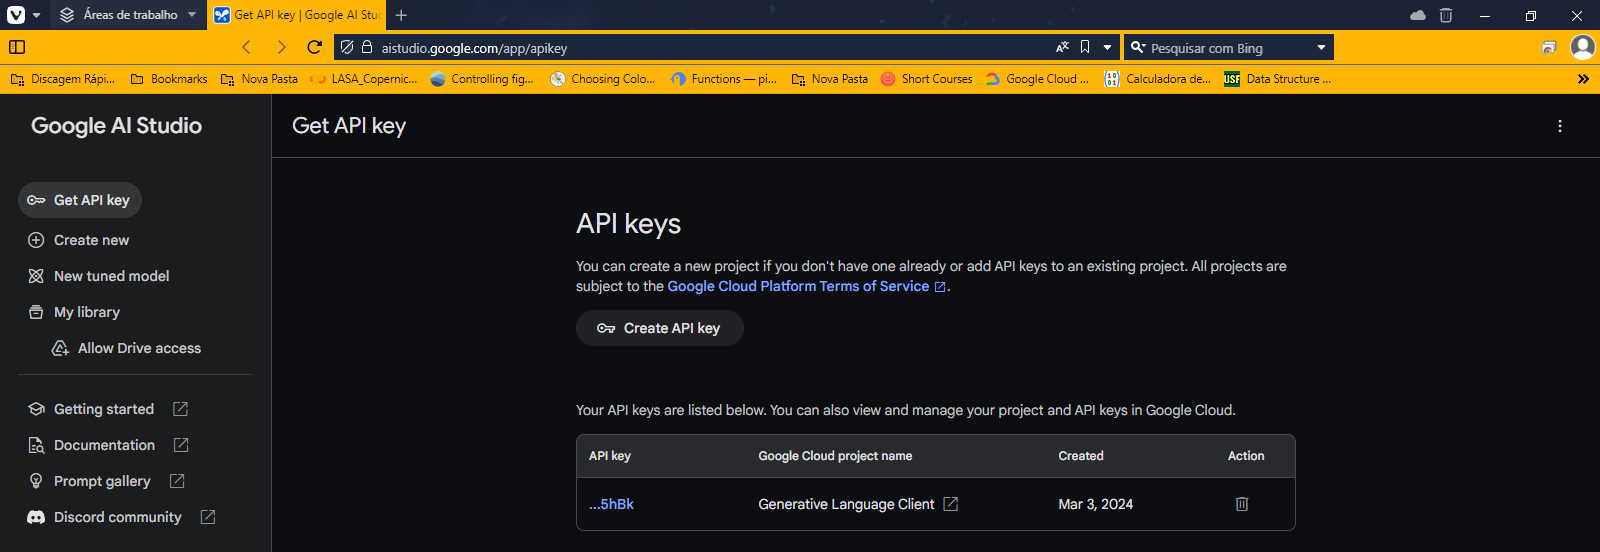

    Ou pela própria documentação da API consegue chegar nessa página ai
    também.

Link: https://ai.google.dev/tutorials/python_quickstart

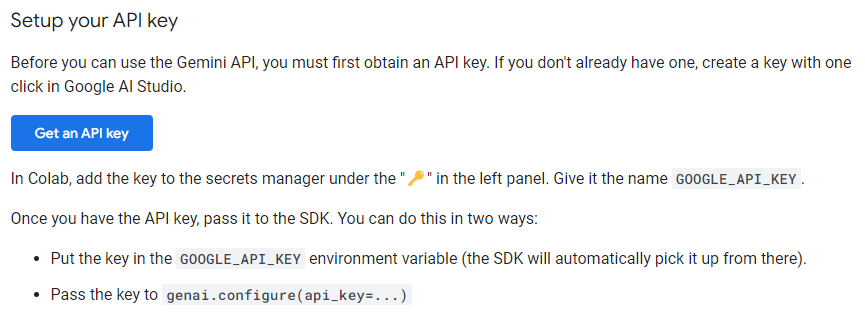

    Feito isso, "Create API Key" é pronto, está feito a sua API key
    para usar no seu código. E reforço, sem a chave de autenticação
    você não vai ter acesso as funcionalidades do SDK.


# Comunicando-se com o SDK:

    Feita a instalação do SDK e a criação da chave de autenticação, agora é
    só se comunicar com os servidores do Google para começar a brincadeira.

    Eu não quero expor a minha API key no código, então eu vou precisar ter
    um pouquinho mais de trabalho para realizar essa autenticação. A solução
    que eu consegui construir aqui foi criar um arquivo no meu drive com as
    informações necessárias para a autenticação e puxar isso no código.

    Pode não ser a solução mais elegante e de fato não é... Mas foi o que eu
    consegui pensar aqui. Caso você conheça outra forma de fazer, que com
    certeza tem, fico deveras agradecido se você puder compartilhar.

In [ ]:
# Packages de Suporte:
import pathlib
import textwrap
from IPython.display import display # O display é para rodar audio.
from IPython.display import Markdown

# Package da IA generativa:
from google import generativeai as genai

In [ ]:
# Autenticação:
genai.configure(api_key=input("Cole aqui sua API KEY:\n"))# Não deve haver aspas!

# Testando a API do Google:

    Agora começa a diversão, a ideia aqui é explorar é extrair um overviwer
    da API. Não sei você mais eu estou bem curioso pra saber o que vai sair
    disso. A API da OpenAI muita gente já falou sobre, mas aqui temos novidades.

In [ ]:
# Checando os modelos generativos disponíveis:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods: # Você pode retirar esse if para ver todas as opções
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


    Existem outras opções além dessas, inclusive opções
    relacionadas ao processos de geração de texto,
    por exemplo o modelo de embedding. O que é muito
    interessante!

Link Modelos: https://ai.google.dev/models/gemini?hl=pt-br

**Funções Utilizadas**

    Antes de começar a brincar, vamos construir aqui algumas funções
    que vamos utilizar no nosso código. Eu particularmente gosto de
    deixar tudo organizado, então aqui estarão todas as funções
    que vamos utilizar.

In [ ]:
def to_markdown(text):
  '''
    Função construida para ajustar a resposta gerada pelo motor
  generativo Gemini de modo a deixa-la mais estética.
  '''
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Modelo generativo de Texto por texto:

    Começando pelo modelo de Texto por prompt de texto apenas é
    o classico da IA conversacional. Existem algumas diferenças
    entre o modelo que só aceita texto como entrada e o que aceita
    imagens também. Para o que só aceita texto, temos.

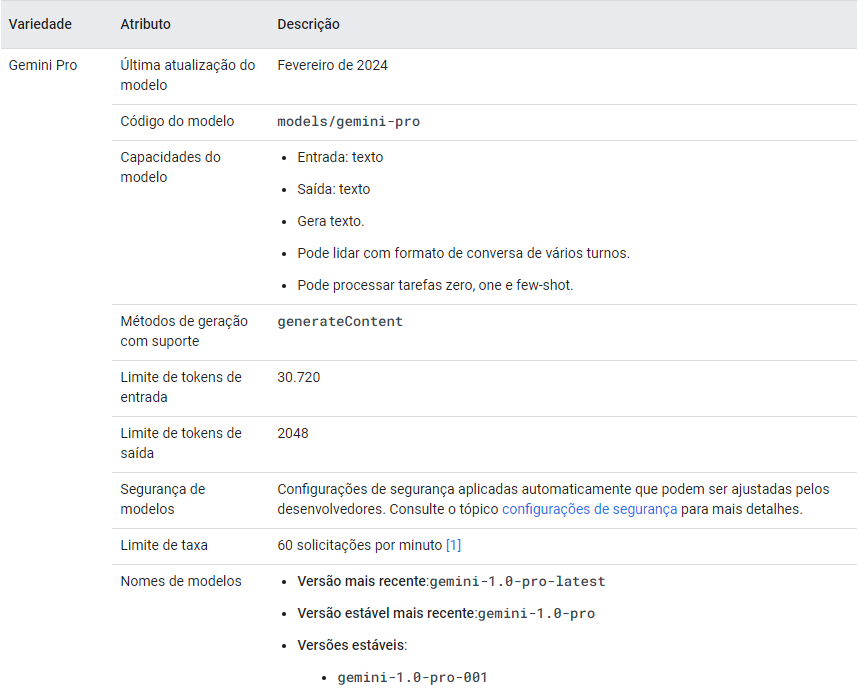

In [ ]:
# Instanciando Modelo:
model = genai.GenerativeModel('gemini-1.0-pro-latest')

In [ ]:
%%time
# Gerando resposta:
response = model.generate_content("What is the meaning of life?")

CPU times: user 132 ms, sys: 10.1 ms, total: 142 ms
Wall time: 9.96 s


In [ ]:
# Resposta crua:
print(response.text)

The meaning of life is a deeply personal and philosophical question that has been pondered by humans throughout history. There is no one definitive answer, as the meaning of life can vary depending on individual beliefs, values, and experiences. However, some common responses include:

1. To find purpose and fulfillment: Many people believe that the meaning of life is to find a sense of purpose and fulfillment in their actions and relationships. This can involve pursuing passions, making a meaningful contribution to society, or simply living a life that brings joy and satisfaction.

2. To live in accordance with one's values: Another perspective is that the meaning of life lies in living in accordance with one's values and principles. This can involve acting with integrity, compassion, and kindness, and striving to make the world a better place.

3. To connect with others and create relationships: Human beings are social creatures, and many people find meaning in life through their rel

    Olha a diferença das duas respostas. A função to_markdown realmente deixa
    a resposta mais bonita.

In [ ]:
# Gerando a resposta elaborada:
to_markdown(response.text)

> The meaning of life is a deeply personal and philosophical question that has been pondered by humans throughout history. There is no one definitive answer, as the meaning of life can vary depending on individual beliefs, values, and experiences. However, some common responses include:
> 
> 1. To find purpose and fulfillment: Many people believe that the meaning of life is to find a sense of purpose and fulfillment in their actions and relationships. This can involve pursuing passions, making a meaningful contribution to society, or simply living a life that brings joy and satisfaction.
> 
> 2. To live in accordance with one's values: Another perspective is that the meaning of life lies in living in accordance with one's values and principles. This can involve acting with integrity, compassion, and kindness, and striving to make the world a better place.
> 
> 3. To connect with others and create relationships: Human beings are social creatures, and many people find meaning in life through their relationships with others. This can involve building strong family ties, making friends, and forming meaningful connections with people from all walks of life.
> 
> 4. To experience growth and learning: Life can be seen as a journey of growth and learning, and some believe that the meaning of life lies in continual personal development. This can involve seeking out new experiences, expanding one's knowledge, and becoming a better person.
> 
> 5. To find spirituality or a sense of the divine: For many people, the meaning of life is connected to a sense of spirituality or a belief in a higher power. This can involve exploring religious traditions, practicing meditation or mindfulness, or simply connecting with nature and the universe.
> 
> Ultimately, the meaning of life is a matter of personal interpretation and exploration. There is no right or wrong answer, and what brings meaning to one person may not be meaningful to another. The key is to find what gives your life purpose, fulfillment, and a sense of connection.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [ ]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a deeply personal and philosophical question that has been pondered by humans throughout history. There is no one definitive answer, as the meaning of life can vary depending on individual beliefs, values, and experiences. However, some common responses include:\n\n1. To find purpose and fulfillment: Many people believe that the meaning of life is to find a sense of purpose and fulfillment in their actions and relationships. This can involve pursuing passions, making a meaningful contribution to society, or simply living a life that brings joy and satisfaction.\n\n2. To live in accordance with one\'s values: Another perspective is that the meaning of life lies in living in accordance with one\'s values and principles. This can involve acting with integrity, compassion, and kindness, and striving to make the world a better place.\n\n3. To connect with others and create relationships: Human beings are social creatures, and many peopl

    Vamos tentas em portugues, pra ver se performa bem o modelo.

In [ ]:
%%time
# Gerando resposta:
resposta = model.generate_content("Qual o sentido da vida?")

# Gerando a resposta elaborada:
to_markdown(resposta.text)

CPU times: user 110 ms, sys: 12.6 ms, total: 123 ms
Wall time: 8.83 s


> O sentido da vida é uma questão filosófica fundamental para a qual não existe uma resposta universalmente aceita. Diferentes pessoas e culturas têm perspectivas diferentes sobre o que torna a vida significativa. Algumas das ideias comuns sobre o sentido da vida incluem:
> 
> * **Propósito:** Acreditar que existe um propósito maior ou uma missão para nossas vidas. Isso pode ser encontrado através de nosso trabalho, relacionamentos, atividades criativas ou busca espiritual.
> * **Felicidade:** Viver uma vida que traga alegria, satisfação e bem-estar. Isso pode envolver atividades como perseguir paixões, construir relacionamentos fortes e ajudar os outros.
> * **Experiência:** Apreciar os momentos presentes e criar experiências memoráveis. Acreditar que o próprio ato de viver e experimentar é significativo.
> * **Contribuição:** Fazer a diferença no mundo, deixando um legado positivo por meio de nossas ações e contribuições. Isso pode incluir ajudar os outros, criar arte ou promover o conhecimento.
> * **Conexão:** Conectar-se com outras pessoas, natureza e o universo. Viver em harmonia e interdependência com o mundo ao nosso redor.
> * **Crescimento pessoal:** Buscar autoconhecimento, crescimento e transformação. Acreditar que a jornada de se tornar a melhor versão de si mesmo é significativa.
> * **Espiritualidade:** Encontrar significado através de uma conexão com o divino, o transcendente ou o desconhecido. Isso pode envolver práticas como meditação, oração ou experiências místicas.
> 
> Em última análise, o sentido da vida é algo que cada indivíduo deve determinar por si mesmo. Não há uma resposta "certa" ou "errada", e o que é significativo para uma pessoa pode não ser para outra. O importante é viver uma vida autêntica e significativa para você.


    Por padrão, o modelo retorna uma resposta após concluir todo o processo
    de geração. Você também pode transmitir a resposta à medida que ela é
    gerada, e o modelo retornará partes da resposta assim que forem geradas.

In [ ]:
%%time
# Gerando resposta em tempo real:
resposta_stream = model.generate_content("Qual o sentido da vida?", stream=True)

# Reposta:
for chunk in resposta_stream:
  print(chunk.text)
  print("_"*80)

O sentido da vida é uma questão filosófica complexa e pessoal, sem uma
________________________________________________________________________________
 resposta definitiva. No entanto, aqui estão algumas perspectivas comuns sobre o sentido da vida:

**Propósito Pessoal:**

* Encontrar propósito e realização nas
________________________________________________________________________________
 atividades, relacionamentos e contribuições que você faz para o mundo.
* Viver de acordo com seus valores, crenças e paixões.
* Estabelecer metas e trabalhar para alcançá-las, sentindo uma sensação de crescimento e propósito.

**Experiência e Apreciação:**


________________________________________________________________________________
* Experimentar a plenitude do momento presente e apreciar as coisas boas da vida.
* Conectar-se com a natureza, a arte e outras experiências que trazem alegria e significado.
* Cultivar a gratidão e a apreciação pelas pessoas e coisas em sua vida.

**Contribuição 

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [ ]:
try:
  print(response.text)
except Exception as e:
  print(f'{type(e).__name__}: {e}')

The meaning of life is a deeply personal and philosophical question that has been pondered by humans throughout history. There is no one definitive answer, as the meaning of life can vary depending on individual beliefs, values, and experiences. However, some common responses include:

1. To find purpose and fulfillment: Many people believe that the meaning of life is to find a sense of purpose and fulfillment in their actions and relationships. This can involve pursuing passions, making a meaningful contribution to society, or simply living a life that brings joy and satisfaction.

2. To live in accordance with one's values: Another perspective is that the meaning of life lies in living in accordance with one's values and principles. This can involve acting with integrity, compassion, and kindness, and striving to make the world a better place.

3. To connect with others and create relationships: Human beings are social creatures, and many people find meaning in life through their rel

    Performa bem, mas uma coisa interessante é que ele não muda as respostas né.
    Isso é uma coisa curiosa. Isso significa, a grosso modo, que o modelo é
    realmente bem simples. Não é um crime, se responder bem, ta bom.

In [ ]:
%%time
# Input:
texto = '''
Você consegue conversar? Me construa um poema de 5 estrofes, onde cada estrofe do poema
é escrito numa das 5 principais linguas que são entradas para tradução no google tradutor.
'''
# Gerando resposta:
resposta = model.generate_content(texto)

# Gerando a resposta elaborada:
to_markdown(resposta.text)

CPU times: user 84.1 ms, sys: 11.9 ms, total: 96 ms
Wall time: 6.86 s


> **Inglês**
> I seek words that dance upon the page,
> A symphony of language, a vibrant stage.
> In English's realm, I find my voice,
> Expressing thoughts that give me choice.
> 
> **Espanhol**
> En el español, mi pasión fluye,
> Sus sonidos dulces, una dulce melodía.
> Las palabras se entrelazan con emoción,
> Creando historias que conmueven el corazón.
> 
> **Francês**
> Le français, une langue de grâce et d'éclat,
> Ses mots délicats, un parfum d'antan.
> Dans ses phrases, je trouve mon élan,
> Exprimant mes rêves, mon esprit vagabond.
> 
> **Chinês**
> 中文之美，如丝绸般细腻，
> 方块字字，蕴藏着智慧深邃。
> 笔走龙蛇，挥洒出心意，
> 诉说着古老的传说和今昔。
> 
> **Hindi**
> हिंदी की मधुरता, मेरे हृदय की आवाज़,
> शब्दों का जादू, जो भावों को बाँधता है।
> इस भाषा में, मैं अपनी कहानी गाता हूँ,
> जीवन के रंगों को, अपने शब्दों से सजाता हूँ।

    Eu acho que essa é a parte mais interessante, que é, de certo modo,
    ter acesso as métricas do google. Esse é um dos diferenciais do
    modelos deles. E é o que esperamos né, que pelo menos com informações
    do google, o modelo funcione bem.

## Modelo Generativo de Texto por Imagem:

    O modelo generativo de texto por imagem também recebe texto. A primeira
    vista, eu achei um modelo mais interessante, vamos ver no que dá.

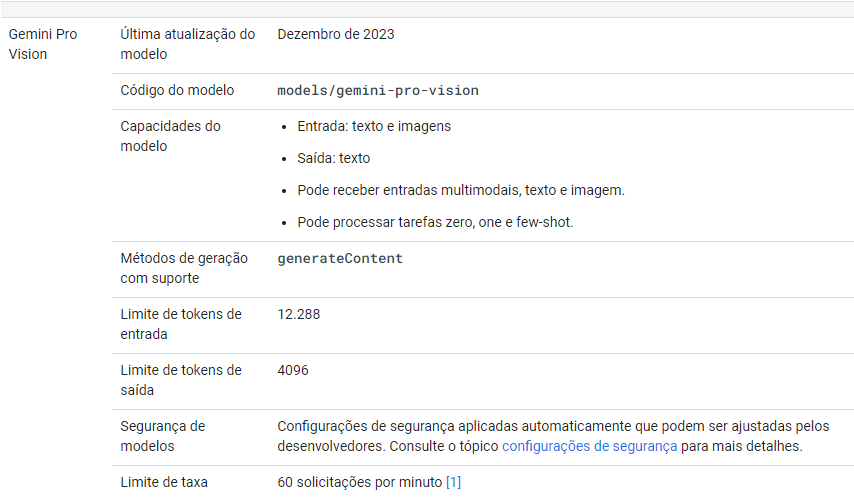

In [ ]:
# Package Suporte:
import PIL.Image

In [ ]:
# Baixando imagem:
!curl -o gatinho_image.jpg https://img.freepik.com/fotos-gratis/gatinho-domestico-fofo-senta-na-janela-olhando-para-fora-da-ia-generativa_188544-12519.jpg?w=1060&t=st=1709487563~exp=1709488163~hmac=9be93814b6ea30d247cb9977baea98041be7ccb5b5e7baec46f59a0a2d3becf7

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  107k  100  107k    0     0   680k      0 --:--:-- --:--:-- --:--:--  676k


In [ ]:
!curl -o darthvader.jpg https://i.pinimg.com/originals/05/f2/6f/05f26f2f85b1a48ffe107345eb4c44fe.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 42524  100 42524    0     0   225k      0 --:--:-- --:--:-- --:--:--  226k


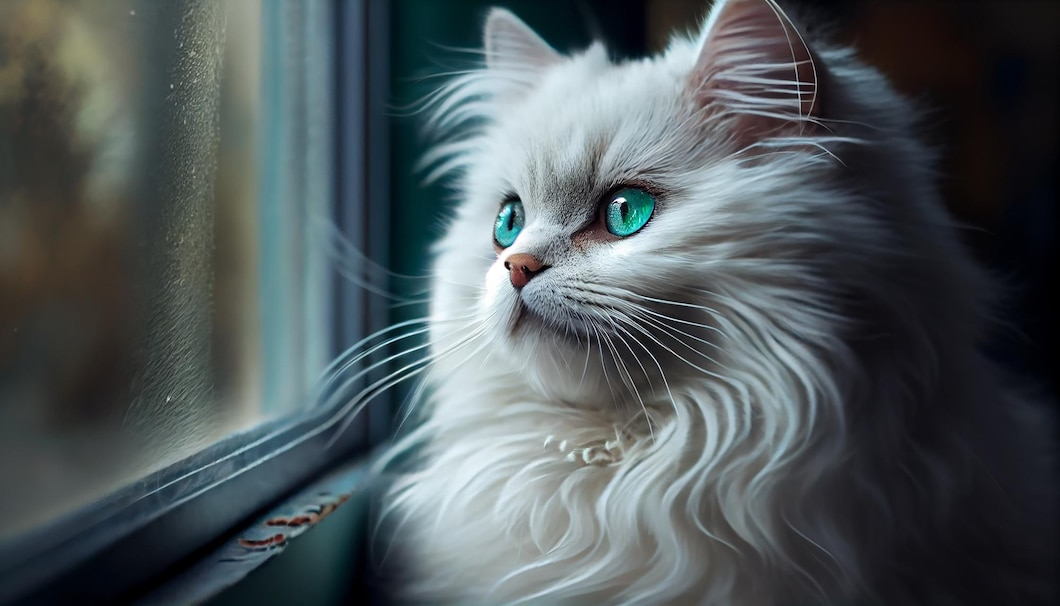

In [ ]:
# Abrindo imagem:
gatinho_image = PIL.Image.open('gatinho_image.jpg');gatinho_image

In [ ]:
# Instanciando Modelo:
image_model = genai.GenerativeModel('gemini-1.0-pro-vision-latest')

In [ ]:
%%time
# Gerando Resposta:
response_img = image_model.generate_content(gatinho_image)

translate = f'''
Consegue traduzir esse texto pra pt-br pra mim?

{response_img.text}
'''

translate_response_image = model.generate_content(translate)

# Resposta:
to_markdown(translate_response_image.text)

CPU times: user 143 ms, sys: 6.47 ms, total: 149 ms
Wall time: 9.12 s


> Esta é uma imagem de um gato branco olhando para fora de uma janela. O gato tem olhos azuis e pelos brancos compridos. A janela é feita de vidro e tem uma moldura preta. O gato está sentado em uma superfície branca. O fundo está desfocado e é composto por uma parede e um piso. A parede é pintada de branco e o piso é feito de madeira.

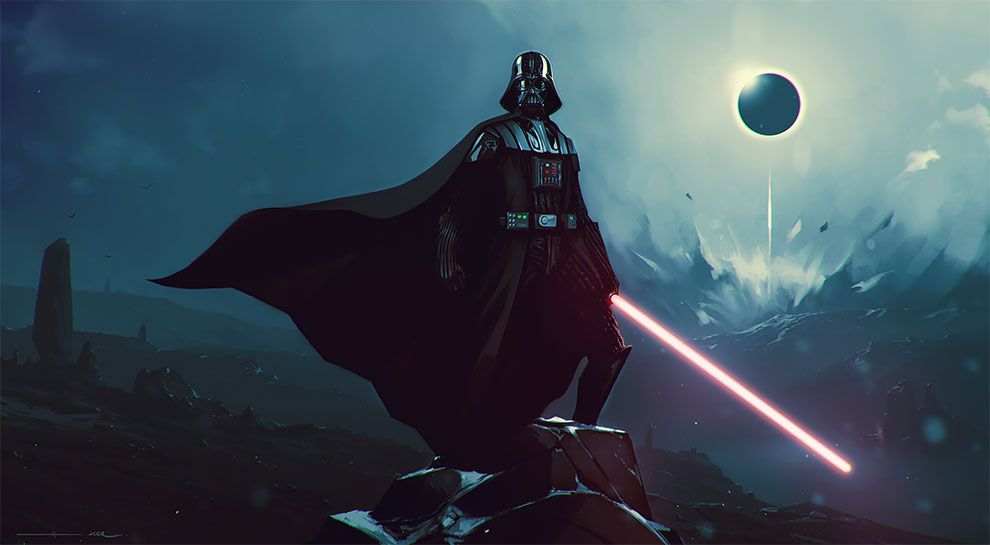

In [ ]:
# Abrindo imagem:
darth_vader = PIL.Image.open('darthvader.jpg');darth_vader

In [ ]:
%%time
# Gerando Resposta:
response_img = image_model.generate_content(darth_vader)

translate = f'''
Consegue traduzir esse texto pra pt-br pra mim?

{response_img.text}
'''

translate_response_image = model.generate_content(translate)

# Resposta:
to_markdown(translate_response_image.text)

CPU times: user 155 ms, sys: 12.7 ms, total: 168 ms
Wall time: 11.5 s


> A imagem mostra Darth Vader, um personagem fictício da franquia Star Wars. Ele é um poderoso Lorde Sith e o principal antagonista da trilogia original. Nesta imagem, ele é retratado como uma figura alta e imponente com um sabre de luz vermelho. Ele está em pé em um afloramento rochoso, com um céu escuro e tempestuoso atrás dele. A superfície do planeta está coberta de neve e gelo. A imagem é cheia de tensão dramática e transmite uma sensação de poder e ameaça.

## Chat de Conversa:

    O Gemini permite que se tenha conversas livres em vários turnos.
    A classe ChatSession simplifica o processo gerenciando o estado
    da conversa, portanto, diferentemente de generate_content, você
    pode armazenar o histórico da conversa como uma lista.

In [ ]:
# Instanciando Modelo:
model = genai.GenerativeModel('gemini-pro')

# Instanciando tipo de task:
chat = model.start_chat(history=[]);chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
    ),
    history=[]
)

Observação do Google:

    O modelo de visão gemini-pro-vision não é otimizado para
    bate-papo multiturno. Ou seja, chat só com texto mesmo.

In [ ]:
# Gerando pergunta:
response = chat.send_message("Oi, sobre o que podemos conversar?")

#Resposta:
to_markdown(response.text)

> **Tópicos Gerais:**
> 
> * Notícias e atualidades
> * Cultura e entretenimento
> * Tecnologia e inovação
> * Viagens e exploração
> * Estilo de vida e bem-estar
> 
> **Tópicos Específicos:**
> 
> * **Ciências:** Física, química, biologia
> * **Artes:** Pintura, escultura, música, literatura
> * **História:** Eventos históricos, figuras importantes
> * **Geografia:** Países, cidades, recursos naturais
> * **Sociedade:** Questões sociais, culturais e políticas
> * **Saúde:** Medicina, nutrição, exercícios físicos
> * **Hobbies:** Esportes, colecionismo, jardinagem
> * **Finanças:** Investimento, economia, planejamento financeiro
> * **Filosofia:** Ética, lógica, metafísica
> * **Espiritualidade:** Religião, misticismo, desenvolvimento pessoal
> 
> **Conversas Pessoais:**
> 
> * **Objetivos e aspirações:** Sonhos, planos, valores
> * **Experiências e memórias:** História de vida, momentos marcantes
> * **Fortes e fracos:** Qualidades, desafios e áreas de crescimento
> * **Relacionamentos:** Família, amigos, romance
> * **Hobbies e interesses:** Atividades que trazem alegria e realização
> * **Credibilidade:** Valores, crenças e perspectivas de vida
> * **Perspectivas e opiniões:** Visões sobre o mundo e questões atuais
> * **Emoções e sentimentos:** Alegria, tristeza, raiva, esperança

    O método ChatSession.send_message retorna o mesmo tipo
    GenerateContentResponse que GenerativeModel.generate_content.
    Ele também anexa sua mensagem e a resposta ao histórico de
    bate-papo:

In [ ]:
# Checado histórico:
chat.history

[parts {
   text: "Oi, sobre o que podemos conversar?"
 }
 role: "user",
 parts {
   text: "**T\303\263picos Gerais:**\n\n* Not\303\255cias e atualidades\n* Cultura e entretenimento\n* Tecnologia e inova\303\247\303\243o\n* Viagens e explora\303\247\303\243o\n* Estilo de vida e bem-estar\n\n**T\303\263picos Espec\303\255ficos:**\n\n* **Ci\303\252ncias:** F\303\255sica, qu\303\255mica, biologia\n* **Artes:** Pintura, escultura, m\303\272sica, literatura\n* **Hist\303\263ria:** Eventos hist\303\263ricos, figuras importantes\n* **Geografia:** Pa\303\255ses, cidades, recursos naturais\n* **Sociedade:** Quest\303\265es sociais, culturais e pol\303\255ticas\n* **Sa\303\272de:** Medicina, nutri\303\247\303\243o, exerc\303\255cios f\303\255sicos\n* **Hobbies:** Esportes, colecionismo, jardinagem\n* **Finan\303\247as:** Investimento, economia, planejamento financeiro\n* **Filosofia:** \303\211tica, l\303\263gica, metaf\303\255sica\n* **Espiritualidade:** Religi\303\243o, misticismo, desenvolvim

    Note que times um acrescento de conteúdo no nosso histórico.
    Bem interessante, de fato.

In [ ]:
# Analisando o histórico:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: Oi, sobre o que podemos conversar?

> **model**: **Tópicos Gerais:**
> 
> * Notícias e atualidades
> * Cultura e entretenimento
> * Tecnologia e inovação
> * Viagens e exploração
> * Estilo de vida e bem-estar
> 
> **Tópicos Específicos:**
> 
> * **Ciências:** Física, química, biologia
> * **Artes:** Pintura, escultura, música, literatura
> * **História:** Eventos históricos, figuras importantes
> * **Geografia:** Países, cidades, recursos naturais
> * **Sociedade:** Questões sociais, culturais e políticas
> * **Saúde:** Medicina, nutrição, exercícios físicos
> * **Hobbies:** Esportes, colecionismo, jardinagem
> * **Finanças:** Investimento, economia, planejamento financeiro
> * **Filosofia:** Ética, lógica, metafísica
> * **Espiritualidade:** Religião, misticismo, desenvolvimento pessoal
> 
> **Conversas Pessoais:**
> 
> * **Objetivos e aspirações:** Sonhos, planos, valores
> * **Experiências e memórias:** História de vida, momentos marcantes
> * **Fortes e fracos:** Qualidades, desafios e áreas de crescimento
> * **Relacionamentos:** Família, amigos, romance
> * **Hobbies e interesses:** Atividades que trazem alegria e realização
> * **Credibilidade:** Valores, crenças e perspectivas de vida
> * **Perspectivas e opiniões:** Visões sobre o mundo e questões atuais
> * **Emoções e sentimentos:** Alegria, tristeza, raiva, esperança

**Conclusão:**

    Realmente é uma API bem interessante, apesar de menos opções de
    modelo que a Open AI, é uma API interessante e o fato de ser
    inicialmente gratuita torna uma opção bastante interessante.


    O que tem de modelos é isso, o que eu vou testar agora são
    outras coisas referentes a construção do modelo, mas que
    me interessam também.

## Usando o modelo de Embedding:

    Embedding é uma técnica usada para representar informações como
    uma lista de números de ponto flutuante em uma matriz. Computador é uma
    máquina de calcular, então ele não entende letras, só entende números.
    Com o Gemini,você pode representar texto (palavras, frases e blocos de
    texto) em formato vetorizado, facilitando a comparação e o contraste de
    incorporações. Por exemplo, dois textos que partilham um assunto ou
    sentimento semelhante devem ter incorporações semelhantes, que podem
    ser identificadas através de técnicas de comparação matemática, como
    a similaridade de cossenos. Para obter mais informações sobre como e
    por que você deve usar embeddings, consulte o guia de Embeddings.

Glossário do Desenvolvedor: https://developers.google.com/machine-learning/glossary?hl=pt-br#embedding-vector

Guia de Embedding: https://ai.google.dev/docs/embeddings_guide?hl=pt-br

    Use o método embed_content para gerar embeddings. O método
    lida com a incorporação para as seguintes tarefas (task_type):

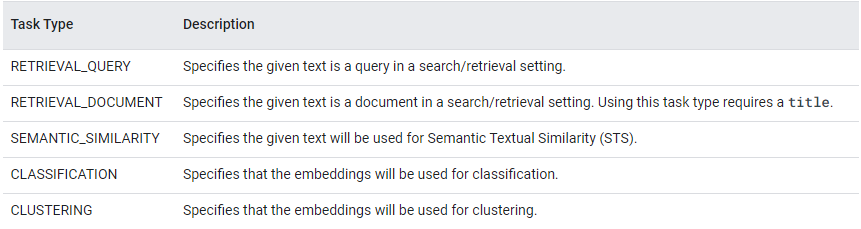    

In [ ]:
# Package Suporte:
import numpy as np

In [ ]:
# Instanciando o modelo:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]\n', f'tamanho do Embedding: {len(result["embedding"])} valores')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]
 tamanho do Embedding: 768 valores


In [ ]:
# Instanciando modelo - Multiplas entradas:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(result['embedding'])[:50], '... TRIMMED...', f'tamanho do Embedding: {np.array(result["embedding"]).shape} valores')

[[0.0040260437, 0.004124458, -0.014209415, -0.0018 ... TRIMMED... tamanho do Embedding: (3, 768) valores
[[0.0040260437, 0.004124458, -0.014209415, -0.0018 ... TRIMMED... tamanho do Embedding: (3, 768) valores
[[0.0040260437, 0.004124458, -0.014209415, -0.0018 ... TRIMMED... tamanho do Embedding: (3, 768) valores


    Embora a função genai.embed_content aceite strings simples ou listas
    de strings, na verdade ela é construída em torno do tipo glm.Content
    (como GenerativeModel.generate_content). Os objetos glm.Content são
    as principais unidades de conversação na API.

    Embora o objeto glm.Content seja multimodal, o método embed_content
    suporta apenas incorporações de texto. Este design dá à API a
    possibilidade de expansão para embeddings multimodais.

In [ ]:
response.candidates[0].content

parts {
  text: "**T\303\263picos Gerais:**\n\n* Not\303\255cias e atualidades\n* Cultura e entretenimento\n* Tecnologia e inova\303\247\303\243o\n* Viagens e explora\303\247\303\243o\n* Estilo de vida e bem-estar\n\n**T\303\263picos Espec\303\255ficos:**\n\n* **Ci\303\252ncias:** F\303\255sica, qu\303\255mica, biologia\n* **Artes:** Pintura, escultura, m\303\272sica, literatura\n* **Hist\303\263ria:** Eventos hist\303\263ricos, figuras importantes\n* **Geografia:** Pa\303\255ses, cidades, recursos naturais\n* **Sociedade:** Quest\303\265es sociais, culturais e pol\303\255ticas\n* **Sa\303\272de:** Medicina, nutri\303\247\303\243o, exerc\303\255cios f\303\255sicos\n* **Hobbies:** Esportes, colecionismo, jardinagem\n* **Finan\303\247as:** Investimento, economia, planejamento financeiro\n* **Filosofia:** \303\211tica, l\303\263gica, metaf\303\255sica\n* **Espiritualidade:** Religi\303\243o, misticismo, desenvolvimento pessoal\n\n**Conversas Pessoais:**\n\n* **Objetivos e aspira\303\247\3

In [ ]:
result_content = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result_content['embedding'])[:50], '... TRIMMED]\n', f'tamanho do Embedding: {len(result_content["embedding"])} valores')

[0.028765086, -0.070861705, -0.011504988, 0.014359 ... TRIMMED]
 tamanho do Embedding: 768 valores


In [ ]:
chat.history

[parts {
   text: "Oi, sobre o que podemos conversar?"
 }
 role: "user",
 parts {
   text: "**T\303\263picos Gerais:**\n\n* Not\303\255cias e atualidades\n* Cultura e entretenimento\n* Tecnologia e inova\303\247\303\243o\n* Viagens e explora\303\247\303\243o\n* Estilo de vida e bem-estar\n\n**T\303\263picos Espec\303\255ficos:**\n\n* **Ci\303\252ncias:** F\303\255sica, qu\303\255mica, biologia\n* **Artes:** Pintura, escultura, m\303\272sica, literatura\n* **Hist\303\263ria:** Eventos hist\303\263ricos, figuras importantes\n* **Geografia:** Pa\303\255ses, cidades, recursos naturais\n* **Sociedade:** Quest\303\265es sociais, culturais e pol\303\255ticas\n* **Sa\303\272de:** Medicina, nutri\303\247\303\243o, exerc\303\255cios f\303\255sicos\n* **Hobbies:** Esportes, colecionismo, jardinagem\n* **Finan\303\247as:** Investimento, economia, planejamento financeiro\n* **Filosofia:** \303\211tica, l\303\263gica, metaf\303\255sica\n* **Espiritualidade:** Religi\303\243o, misticismo, desenvolvim

    Da mesma forma, o histórico de bate-papo contém uma lista de
    objetos glm.Content, que você pode passar diretamente para a
    função embed_content:


In [ ]:
result_chat = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result_chat['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[0.037947237, -0.051217142, -0.0405387, 0.00324251 ... TRIMMED...
[0.028765086, -0.070861705, -0.011504988, 0.014359 ... TRIMMED...
